In [1]:
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [267]:
#Cargo los datos en memoria

postulantes_educacion = pd.read_csv('C:/Users/Mariano/Downloads/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')
postulantes_genero_y_edad = pd.read_csv('C:/Users/Mariano/Downloads/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv')
vistas = pd.read_csv('C:/Users/Mariano/Downloads/datos_navent_fiuba/fiuba_3_vistas.csv')
postulaciones = pd.read_csv('C:/Users/Mariano/Downloads/datos_navent_fiuba/fiuba_4_postulaciones.csv')
avisos_online = pd.read_csv('C:/Users/Mariano/Downloads/datos_navent_fiuba/fiuba_5_avisos_online.csv')
avisos_detalle = pd.read_csv('C:/Users/Mariano/Downloads/datos_navent_fiuba/fiuba_6_avisos_detalle.csv')






# Parte 1: Análisis de los datos: Estructura, formato, tipos de datos.


## Primer dataframe: postulantes_educacion

In [32]:
#Vistazo a la estructura del dataframe

postulantes_educacion.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [41]:
#Posee 298231 registros

postulantes_educacion.shape

(298231, 3)

In [33]:
#Renombro las columnas a un nombre más apropiado

postulantes_educacion = postulantes_educacion.rename(columns={"nombre":"gradoactual"})
postulantes_educacion.head()

,idpostulante,gradoactual,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [34]:
#Hay algun dato nulo?

postulantes_educacion.isnull().any()

idpostulante    False
gradoactual     False
estado          False
dtype: bool

In [56]:
#Existen 188752 postulantes diferentes

postulantes_educacion['idpostulante'].value_counts().size

188752

In [35]:
#La variable gradoactual es categórica, veamos cuáles son sus posibles valores. 

postulantes_educacion['gradoactual'].value_counts()

Secundario           110256
Universitario        104295
Terciario/Técnico     47733
Otro                  24748
Posgrado               7387
Master                 3598
Doctorado               214
Name: gradoactual, dtype: int64

In [36]:
#Estado también es categórica, veamos sus posibles estados

postulantes_educacion['estado'].value_counts()

Graduado      194474
En Curso       78531
Abandonado     25226
Name: estado, dtype: int64

## Segundo dataframe: postulantes_genero_y_edad

In [92]:
#Vistazo a la estructura del dataframe

postulantes_genero_y_edad.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [93]:
#200888 registros

postulantes_genero_y_edad.shape

(200888, 3)

In [94]:
#Hay postulantes sin fecha de nacimiento cargada, luego veremos cuáles son

postulantes_genero_y_edad.isnull().any()

idpostulante       False
fechanacimiento     True
sexo               False
dtype: bool

In [95]:
#No hay postulantes repetidos en el dataframe, pero son más de los que aparecen en el postulantes_educacion. Luego hay
#postulantes que no poseen ninguna educación.

postulantes_genero_y_edad['idpostulante'].value_counts().size

200888

In [96]:
#Comprobamos los posibles valores de sexo

postulantes_genero_y_edad['sexo'].value_counts()

FEM           101981
MASC           94339
NO_DECLARA      4568
Name: sexo, dtype: int64

In [109]:
#Vimos que hay postulantes sin fecha de nacimiento cargada, veamos cuántos son
#Tenemos 4750 postulantes sin fecha de nacimiento declarada

postulantes_genero_y_edad.loc[postulantes_genero_y_edad.fechanacimiento.isnull()]



,idpostulante,fechanacimiento,sexo
930,NM1J0z,NaN,MASC
1377,Z8warE,NaN,NO_DECLARA
2149,Nzj9lz,NaN,NO_DECLARA
2435,ZD5wXR,NaN,MASC
3413,8bdWrW,NaN,MASC
3655,5boBRZ,NaN,NO_DECLARA
3928,Z4z8R8,NaN,NO_DECLARA
4725,8LqOvL,NaN,NO_DECLARA
10604,epR0o2,NaN,NO_DECLARA
10623,8kwONz,NaN,NO_DECLARA


In [116]:
#Observando el formato de las fechas no nulas, vemos que existen 7 que no respetan el formato AA/MM/DD
#Dado que representan un porcentaje ínfimo del total de registros, elegimos ignorarlos para así evitar tener que 
#asumir qué fecha representan.


postulantes_genero_y_edad.loc[postulantes_genero_y_edad.fechanacimiento.isnull()==False].sort_values('fechanacimiento',ascending=True)

,idpostulante,fechanacimiento,sexo
148638,GNZOvAv,0004-07-19,MASC
149653,1QPQ8QL,0011-03-08,MASC
145683,dYjV0rb,0012-11-04,NO_DECLARA
130846,8M2R6pz,0024-02-09,FEM
71458,LN85Y3b,0029-05-11,MASC
56206,xkPwXwY,0031-12-11,FEM
141832,A36Npjj,0033-09-14,FEM
154559,xkdvwm0,1775-07-09,MASC
164618,96X1loa,1917-07-08,MASC
156483,4rP8l0R,1921-08-18,FEM


In [121]:
#Convierto la columna fechanacimiento a formato datetime. 

postulantes_genero_y_edad['fechanacimiento'] = pd.to_datetime(postulantes_genero_y_edad['fechanacimiento'], errors='coerce')

In [88]:
#Si revisamos ahora a los postulantes sin fecha de nacimiento, observamos que ahora hay 7 más que antes. Estos 7 deberían ser
#los que tenían el formato incorrecto.

postulantes_genero_y_edad.loc[postulantes_genero_y_edad.fechanacimiento.isnull()]

,idpostulante,fechanacimiento,sexo
930,NM1J0z,NaT,MASC
1377,Z8warE,NaT,NO_DECLARA
2149,Nzj9lz,NaT,NO_DECLARA
2435,ZD5wXR,NaT,MASC
3413,8bdWrW,NaT,MASC
3655,5boBRZ,NaT,NO_DECLARA
3928,Z4z8R8,NaT,NO_DECLARA
4725,8LqOvL,NaT,NO_DECLARA
10604,epR0o2,NaT,NO_DECLARA
10623,8kwONz,NaT,NO_DECLARA


In [122]:
#Tal como lo anticipamos, ahora tienen fecha de nacimiento nula.

postulantes_genero_y_edad.iloc[[148638,149653,145683,130846,71458,56206,141832],:]

,idpostulante,fechanacimiento,sexo
148638,GNZOvAv,NaT,MASC
149653,1QPQ8QL,NaT,MASC
145683,dYjV0rb,NaT,NO_DECLARA
130846,8M2R6pz,NaT,FEM
71458,LN85Y3b,NaT,MASC
56206,xkPwXwY,NaT,FEM
141832,A36Npjj,NaT,FEM


In [211]:
#Vamos ahora a agregar una columna adicional al dataframe, de modo que podamos observar la edad de cada persona

postulantes_genero_y_edad['edad'] = ((pd.datetime.today() - postulantes_genero_y_edad['fechanacimiento']).dt.days/365)
postulantes_genero_y_edad['edad'] = postulantes_genero_y_edad['edad'].fillna(0)
postulantes_genero_y_edad['edad'] = postulantes_genero_y_edad['edad'].astype(int)
postulantes_genero_y_edad

,idpostulante,fechanacimiento,sexo,edad
0,NM5M,1970-12-03,FEM,47
1,5awk,1962-12-04,FEM,55
2,ZaO5,1978-08-10,FEM,39
3,NdJl,1969-05-09,MASC,48
4,eo2p,1981-02-16,MASC,37
5,Ez8J,1968-12-18,MASC,49
6,aOQq,1966-07-16,MASC,51
7,8BkL,1976-07-21,FEM,41
8,1d2B,1976-02-28,MASC,42
9,NPBx,1981-03-09,MASC,37


In [226]:
#Reviso la edad de las personas que cumplen años el 29/02

postulantes_nacidos_en_febrero = postulantes_genero_y_edad.loc[postulantes_genero_y_edad['fechanacimiento'].dt.month == 2]
postulantes_nacidos_en_febrero.loc[postulantes_nacidos_en_febrero['fechanacimiento'].dt.day == 29].sort_values('fechanacimiento',ascending = False)

,idpostulante,fechanacimiento,sexo,edad
197120,6rP38R3,2000-02-29,FEM,18
194211,3NP3dAJ,2000-02-29,FEM,18
186798,Bm5dkzR,2000-02-29,MASC,18
99625,xka3KJz,1996-02-29,MASC,22
73390,KBzQ4EX,1996-02-29,FEM,22
129557,rm05XGO,1996-02-29,FEM,22
129283,pzMVjZL,1996-02-29,FEM,22
128947,BmB6zNR,1996-02-29,MASC,22
118090,5mdVq4X,1996-02-29,FEM,22
111994,4rdGeJA,1996-02-29,FEM,22


# Tercer dataframe: vistas

In [227]:
#Vistazo a la estructura del dataframe

vistas.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [231]:
#El dataframe posee 961897 registros

vistas.shape

(961897, 3)

In [232]:
#No tenemos registros nulos

vistas.isnull().any()

idAviso         False
timestamp       False
idpostulante    False
dtype: bool

In [235]:
#En este dataframe tenemos 7459 avisos únicos 

vistas['idAviso'].value_counts().size

7458

In [236]:
#Y de los 200888 postulantes del dataset, solamente 87443 han visto al menos un aviso

vistas['idpostulante'].value_counts().size

87443

In [246]:
#Ordeno la informacion sobre la fecha y hora de visualizaciones, modificando su formato y agregando columnas que me permitan
#analizar de forma individual la fecha y la hora.

vistas['timestamp'] = pd.to_datetime(vistas['timestamp'])
vistas['fechavisualizacion'] = vistas['timestamp'].dt.date
vistas['horavisualizacion'] = vistas['timestamp'].dt.time
vistas

,idAviso,timestamp,idpostulante,fechavisualizacion,horavisualizacion
0,1111780242,2018-02-23 18:38:13.187,YjVJQ6Z,2018-02-23,18:38:13.187000
1,1112263876,2018-02-23 18:38:14.296,BmVpYoR,2018-02-23,18:38:14.296000
2,1112327963,2018-02-23 18:38:14.329,wVkBzZd,2018-02-23,18:38:14.329000
3,1112318643,2018-02-23 18:38:17.921,OqmP9pv,2018-02-23,18:38:17.921000
4,1111903673,2018-02-23 18:38:18.973,DrpbXDP,2018-02-23,18:38:18.973000
5,1112355613,2018-02-23 18:38:23.467,rmdWApz,2018-02-23,18:38:23.467000
6,1112346704,2018-02-23 18:38:27.130,Dr6e6Xl,2018-02-23,18:38:27.130000
7,1112282610,2018-02-23 18:38:27.670,A3R9GWl,2018-02-23,18:38:27.670000
8,1112342544,2018-02-23 18:38:31.601,8M24rbM,2018-02-23,18:38:31.601000
9,1112358408,2018-02-23 18:38:32.977,YjrD1ZZ,2018-02-23,18:38:32.977000


# Cuarto dataframe: postulaciones

In [268]:
#Vistazo a la estructura del dataframe

postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [269]:
#Tenemos 3401623 registros

postulaciones.shape

(3401623, 3)

In [279]:
#No hay registros nulos

postulaciones.isnull().any()

idaviso                 False
idpostulante            False
fechahorapostulacion    False
fechapostulacion        False
horapostulacion         False
dtype: bool

In [271]:
#Tenemos 12692 avisos con al menos una postulacion

postulaciones['idaviso'].value_counts().size

12692

In [272]:
#Todos los postulantes del dataset se han postulado al menos a un aviso

postulaciones['idpostulante'].value_counts().size

200888

In [278]:
##Ordeno la informacion sobre la fecha y hora de postulación, modificando su formato y agregando columnas que me permitan
#analizar de forma individual la fecha y la hora.

postulaciones['fechapostulacion'] = pd.to_datetime(postulaciones['fechapostulacion'])
postulaciones = postulaciones.rename(columns={'fechapostulacion':'fechahorapostulacion'})
postulaciones['fechapostulacion'] = postulaciones['fechahorapostulacion'].dt.date
postulaciones['horapostulacion'] = postulaciones['fechahorapostulacion'].dt.time

postulaciones

,idaviso,idpostulante,fechahorapostulacion,fechapostulacion,horapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34,2018-01-15,16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50,2018-02-06,09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47,2018-02-22,09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59,2018-02-22,09:04:59
4,1112237522,5awk,2018-01-25 18:55:03,2018-01-25,18:55:03
5,1112277633,5awk,2018-01-29 13:34:44,2018-01-29,13:34:44
6,1112302347,5awk,2018-02-07 20:49:22,2018-02-07,20:49:22
7,1112291495,5awk,2018-02-07 20:50:13,2018-02-07,20:50:13
8,1112304011,5awk,2018-02-07 20:51:15,2018-02-07,20:51:15
9,1112326289,5awk,2018-02-09 20:24:57,2018-02-09,20:24:57


# Quinto dataframe: avisos_online

In [281]:
#Vistazo a la estructura del dataframe

avisos_online.head()

,idaviso
0,1112355872
1,1112335374
2,1112374842
3,1111984070
4,1111822480


In [283]:
#Existen 5028 avisos

avisos_online.shape

(5028, 1)

In [285]:
#No hay registros nulos

avisos_online.isnull().any()

idaviso    False
dtype: bool

In [288]:
#Tampoco hay ids repetidos

avisos_online['idaviso'].value_counts().size

5028

# Sexto dataframe: avisos_detalle

In [290]:
#Vistazo a la estructura del dataframe

avisos_detalle.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [291]:
#Existen 13534 avisos contra los 5028 que teniamos en avisos_online. Significa que los restantes 8506 están inactivos?

avisos_detalle.shape

(13534, 11)

In [293]:
#Tenemos nulos en los campos ciudad, mapa y denominacion_empresa

avisos_detalle.isnull().any()

idaviso                 False
idpais                  False
titulo                  False
descripcion             False
nombre_zona             False
ciudad                   True
mapacalle                True
tipo_de_trabajo         False
nivel_laboral           False
nombre_area             False
denominacion_empresa     True
dtype: bool

In [310]:
#13487 no tienen registrada la ciudad

avisos_detalle.loc[avisos_detalle['ciudad'].isnull()].shape

(13487, 11)

In [311]:
#Cinco avisos no tienen registrada la empresa que lleva a cabo la búsqueda

avisos_detalle.loc[avisos_detalle['denominacion_empresa'].isnull()].shape

(5, 11)

In [301]:
#Todos los avisos son del mismo país

avisos_detalle['idpais'].value_counts()

1    13534
Name: idpais, dtype: int64

In [312]:
#Zonas entre las que se reparten los avisos, podemos corroborar que todos los avisos 
#corresponden a Buenos Aires como dice la consigna

avisos_detalle['nombre_zona'].value_counts()

Gran Buenos Aires              12654
Capital Federal                  876
Buenos Aires (fuera de GBA)        2
GBA Oeste                          2
Name: nombre_zona, dtype: int64

# Parte 2: Exploración de los datos

## ¿Se ven afectadas las postulaciones según el día de la semana en el que estamos?

In [319]:
#Vamos a responder a la pregunta, para ello pimero necesito identificar en qué día de la semana se realizó cada una
#de las postulaciones del set de datos

postulaciones['diapostulacion'] = postulaciones['fechahorapostulacion'].dt.weekday_name
postulaciones

,idaviso,idpostulante,fechahorapostulacion,fechapostulacion,horapostulacion,diapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34,2018-01-15,16:22:34,Monday
1,1111920714,NM5M,2018-02-06 09:04:50,2018-02-06,09:04:50,Tuesday
2,1112346945,NM5M,2018-02-22 09:04:47,2018-02-22,09:04:47,Thursday
3,1112345547,NM5M,2018-02-22 09:04:59,2018-02-22,09:04:59,Thursday
4,1112237522,5awk,2018-01-25 18:55:03,2018-01-25,18:55:03,Thursday
5,1112277633,5awk,2018-01-29 13:34:44,2018-01-29,13:34:44,Monday
6,1112302347,5awk,2018-02-07 20:49:22,2018-02-07,20:49:22,Wednesday
7,1112291495,5awk,2018-02-07 20:50:13,2018-02-07,20:50:13,Wednesday
8,1112304011,5awk,2018-02-07 20:51:15,2018-02-07,20:51:15,Wednesday
9,1112326289,5awk,2018-02-09 20:24:57,2018-02-09,20:24:57,Friday


In [325]:
#Veamos cómo se distribuyen las postulaciones según en qué día de la semana estamos

postulaciones_segun_dia = postulaciones['diapostulacion'].value_counts()
postulaciones_segun_dia

Wednesday    677836
Monday       668310
Tuesday      658428
Thursday     506163
Friday       446698
Sunday       226857
Saturday     217331
Name: diapostulacion, dtype: int64

Text(0,0.5,'Dia de la semana')

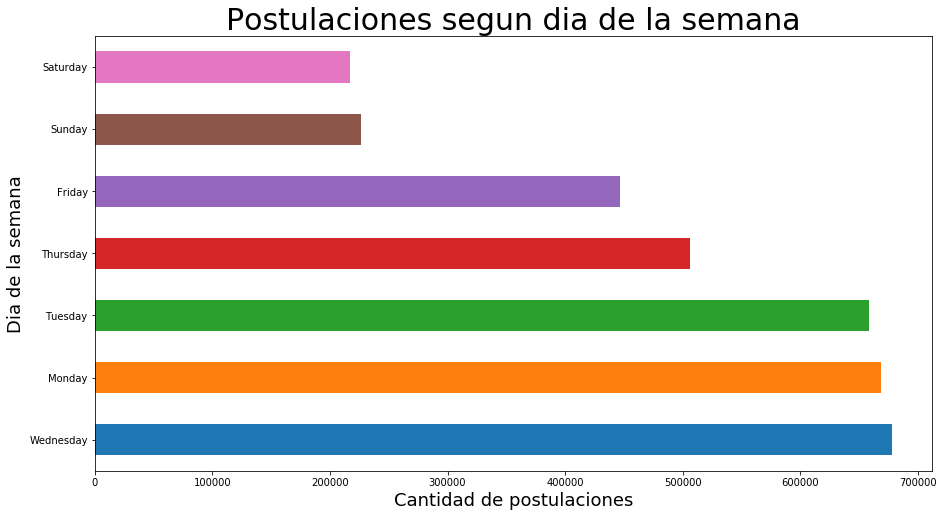

In [326]:
#Ahora lo volcamos a un gráfico para comunicar el resultado.
#La respuesta a la pegunta que formulamos claramente es sí.
#Podemos ver cómo decae la actividad durante la segunda mitad de la semana y cómo se concentra en sus 
#primeros tres días hábiles.

plot = postulaciones_segun_dia.plot(kind="barh", figsize=(15,8))
plot.set_title('Postulaciones segun dia de la semana',fontsize=30)
plot.set_xlabel("Cantidad de postulaciones",fontsize=18)
plot.set_ylabel("Dia de la semana", fontsize=18)

## Actividad durante el dia más concurrido de la semana

In [329]:
#Obtengo todas las postulaciones de los miércoles

postulaciones_miercoles = postulaciones.loc[postulaciones['diapostulacion'] == 'Wednesday']

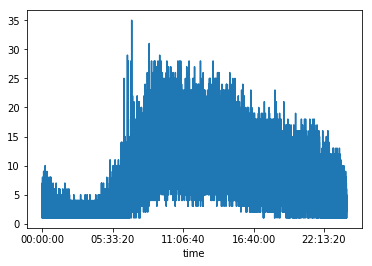

In [337]:


postulaciones_miercoles['horapostulacion'].value_counts().plot.line()

In [17]:
#Cambio el nombre de la columna para trabajr mejor

postulaciones = postulaciones.rename(columns={'fechapostulacion':'fechahorapostulacion'})
postulaciones.head(10)

,idaviso,idpostulante,fechahorapostulacion,diasemana
0,1112257047,NM5M,2018-01-15 16:22:34,Monday
1,1111920714,NM5M,2018-02-06 09:04:50,Tuesday
2,1112346945,NM5M,2018-02-22 09:04:47,Thursday
3,1112345547,NM5M,2018-02-22 09:04:59,Thursday
4,1112237522,5awk,2018-01-25 18:55:03,Thursday
5,1112277633,5awk,2018-01-29 13:34:44,Monday
6,1112302347,5awk,2018-02-07 20:49:22,Wednesday
7,1112291495,5awk,2018-02-07 20:50:13,Wednesday
8,1112304011,5awk,2018-02-07 20:51:15,Wednesday
9,1112326289,5awk,2018-02-09 20:24:57,Friday


In [41]:
#Ahora voy a analizar la cantidad de postulaciones segun los dias del set de datos, voy a considerar los dias solamente

postulaciones['fechapostulacion'] = postulaciones['fechahorapostulacion'].dt.date
postulaciones.head(10)

,idaviso,idpostulante,fechahorapostulacion,diasemana,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34,Monday,2018-01-15
1,1111920714,NM5M,2018-02-06 09:04:50,Tuesday,2018-02-06
2,1112346945,NM5M,2018-02-22 09:04:47,Thursday,2018-02-22
3,1112345547,NM5M,2018-02-22 09:04:59,Thursday,2018-02-22
4,1112237522,5awk,2018-01-25 18:55:03,Thursday,2018-01-25
5,1112277633,5awk,2018-01-29 13:34:44,Monday,2018-01-29
6,1112302347,5awk,2018-02-07 20:49:22,Wednesday,2018-02-07
7,1112291495,5awk,2018-02-07 20:50:13,Wednesday,2018-02-07
8,1112304011,5awk,2018-02-07 20:51:15,Wednesday,2018-02-07
9,1112326289,5awk,2018-02-09 20:24:57,Friday,2018-02-09


In [23]:
#Vistazo al historico de postulaciones por fecha

postulaciones_por_fecha = postulaciones['fechapostulacion'].value_counts()
postulaciones_por_fecha.head(10)

2018-02-19    137104
2018-02-20    132726
2018-02-21    123054
2018-02-26    122688
2018-02-27    119845
2018-02-28    118296
2018-02-22    105738
2018-01-24     97773
2018-01-30     97352
2018-01-29     96300
Name: fechapostulacion, dtype: int64

Text(0,0.5,'Cantidad de postulaciones ')

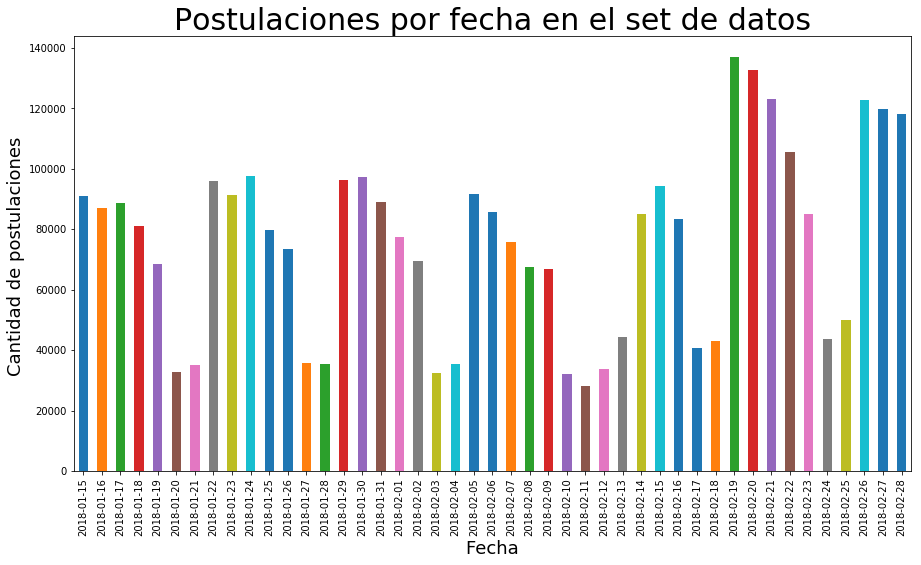

In [53]:
##OBS: Se puede sacar el pedazo de enero que hay y trabajar solamente febrero, es mas prolijo

postulaciones_por_fecha_ordenadas = postulaciones_por_fecha.sort_index()
g = postulaciones_por_fecha_ordenadas.plot(kind='bar', figsize=(15,8))
g.set_title('Postulaciones por fecha en el set de datos',fontsize=30)
g.set_xlabel("Fecha",fontsize=18)
g.set_ylabel("Cantidad de postulaciones ", fontsize=18)